# DeepLabCut Ingestion/Inference

# DeepLabCut manual:
https://github.com/DeepLabCut/DeepLabCut/blob/main/docs/standardDeepLabCut_UserGuide.md

`Dev notes:` Currently, the path structure assumes you have one DLC project directory for all models, as specified within `adamacs.pipeline.get_dlc_root_data_dir`. The parallel function `get_dlc_processed_data_dir` can specify the output directory. 

## TODO

1. Have the DLC model as selector in the Pingest GUI (model.Model() = model_name)
2. Add a checkbox to process DLC data
3. model.PoseEstimationTask.insert_estimation_task(key, key["model_name"], analyze_videos_params={'save_as_csv':True}, task_mode = 'trigger') - have additional options in table?
4. model.RecordingInfo.populate()
model.RecordingInfo()
5. model.PoseEstimation.populate()
6. defer population to tmux or cron jobs?


## Setup

### Connect to the database

If you are don't have your login information, contact the administrator.

Using local config file (see [01_pipeline](./01_pipeline.ipynb)):

In [1]:
import os
# change to the upper level folder to detect dj_local_conf.json
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='adamacs', ("Please move to the main directory")
import datajoint as dj; dj.conn()

[2023-07-27 13:31:29,614][INFO]: Connecting tobiasr@172.26.128.53:3306
[2023-07-27 13:31:29,665][INFO]: Connected tobiasr@172.26.128.53:3306


DataJoint connection (connected) tobiasr@172.26.128.53:3306

In [2]:
dj.config["custom"].get("dlc_root_data_dir")


['/datajoint-data/data/tobiasr/DeepLabCutModels/DB_DLC_tracking',
 '/datajoint-data/data/tobiasr/DeepLabCutModels/NK_DLC_tracking',
 '/']

### Imports and activation

Importing schema from `adamacs.pipeline` automatically activates items.

In [3]:
from adamacs.pipeline import subject, train,  scan, event, trial, behavior, session, model, equipment

## Ingesting videos and training parameters

### Automated

Refer the `user_data` folder in the `adamacs` directory contains CSVs for inserting values into DeepLabCut tables.

1. `config_params.csv` is used for training parameter sets in `train.TrainingParamSet`. The following items are required, but others will also be passed to DLC's `train_network` function when called 
2. `train_videosets.csv` and `model_videos.csv` pass values to `train.VideoSet` and `model.VideoRecording` respectively.
3. `adamacs.ingest.dlc.ingest_dlc_items` will load each of these CSVs

For more information, see [this notebook](https://github.com/CBroz1/workflow-deeplabcut/blob/main/notebooks/04-Automate_Optional.ipynb)

In [4]:
    # from adamacs.ingest.dlc import ingest_dlc_items
    # ingest_dlc_items()

In [5]:
model.VideoRecording().delete()
model.Model.delete()

[2023-07-27 13:31:32,921][INFO]: Deleting 0 rows from `tobiasr_model`.`video_recording`
[2023-07-27 13:31:32,924][INFO]: Deleting 0 rows from `tobiasr_model`.`model`


Nothing to delete.
Nothing to delete.


0

In [6]:
train.schema.list_tables()

['#training_param_set',
 'video_set',
 'video_set__file',
 'training_task',
 '__model_training']

In [7]:
model.schema.list_tables()

['model',
 'model__body_part',
 'video_recording',
 'video_recording__file',
 '#body_part',
 '__model_evaluation',
 '_recording_info',
 'pose_estimation_task',
 '__pose_estimation',
 '__pose_estimation__body_part_position']

### Manual

The same training parameters as above can be manually inserted as follows.

In [8]:
import yaml
from element_interface.utils import find_full_path
from adamacs.paths import get_dlc_root_data_dir
import pathlib
config_path = find_full_path(get_dlc_root_data_dir(), 
                             'from_top_tracking-DJ-2022-02-23/config.yaml')
config_path

PosixPath('/datajoint-data/data/tobiasr/DeepLabCutModels/DB_DLC_tracking/from_top_tracking-DJ-2022-02-23/config.yaml')

In [ ]:
model.VideoRecording.delete()

In [9]:
scansi = "scan9FJ842C3"
scan_key = (scan.Scan & f'scan_id = "{scansi}"').fetch('KEY')[0] 
moviepath = str(list(pathlib.Path((scan.ScanPath() & scan_key).fetch("path")[0]).glob("*top*.mp4*"))[0])

key = {'session_id': scan_key["session_id"],
       'recording_id': scan_key["scan_id"], 
       'camera': "mini2p1_top", # Currently 'scanner' due to in equipment tables
}
model.VideoRecording.insert1(key, skip_duplicates=True)
# do not include an initial `/` in relative file paths   
key.update({'file_path': moviepath,
            'file_id': 0})
model.VideoRecording.File.insert1(key, ignore_extra_fields=True, skip_duplicates=True)

In [10]:
scansi = "scan9FB2LN5C"
scan_key = (scan.Scan & f'scan_id = "{scansi}"').fetch('KEY')[0] 
moviepath = str(list(pathlib.Path((scan.ScanPath() & scan_key).fetch("path")[0]).glob("*top*.mp4*"))[0])

key = {'session_id': scan_key["session_id"],
       'recording_id': scan_key["scan_id"], 
       'camera': "mini2p1_top", # Currently 'scanner' due to in equipment tables
}
model.VideoRecording.insert1(key, skip_duplicates=True)
# do not include an initial `/` in relative file paths   
key.update({'file_path': moviepath,
            'file_id': 1})
model.VideoRecording.File.insert1(key, ignore_extra_fields=True, skip_duplicates=True)

In [29]:
scansi = "scan9FHELAYA"
scan_key = (scan.Scan & f'scan_id = "{scansi}"').fetch('KEY')[0] 
moviepath = str(list(pathlib.Path((scan.ScanPath() & scan_key).fetch("path")[0]).glob("*copy*.mp4"))[0])
# moviepath = str(list(pathlib.Path((scan.ScanPath() & scan_key).fetch("path")[0]).glob("*top*.mp4-copy.mp4"))[0])

key = {'session_id': scan_key["session_id"],
       'recording_id': scan_key["scan_id"], 
       'camera': "mini2p1_top", # Currently 'scanner' due to in equipment tables
}
model.VideoRecording.insert1(key, skip_duplicates=True)
# do not include an initial `/` in relative file paths   
key.update({'file_path': moviepath,
            'file_id': 2})
model.VideoRecording.File.insert1(key, ignore_extra_fields=True, skip_duplicates=True)

In [30]:
model.VideoRecording() * model.VideoRecording.File() * equipment.Device()

session_id,recording_id,file_id,camera,"file_path filepath of video, relative to root data directory",camera_description
sess9FHELAYA,scan9FHELAYA,2,mini2p1_top,/datajoint-data/data/tobiasr/RN_OPI-1681_2023-04-05_scan9FHELAYA_sess9FHELAYA/scan9FHELAYA_top_video_2023-04-05T15_19_53.mp4-copy.mp4,"Basler a2A1920-160umBAS, Xx objective"


## Model Training

The `TrainingTask` table queues up training. To launch training from a different machine, one needs to edit DLC's config files to reflect updated paths. For training, this includes `dlc-models/*/*/train/pose_cfg.yaml`

`CB DEV NOTE:` I'm missing the following videos used to originally train the model:
- top_video2022-02-17T15_56_10.mp4
- top_video2022-02-21T12_18_09.mp4

#### DeepLabcut Tables

The `VideoSet` table in the `train` schema retains records of files generated in the video labeling process (e.g., `h5`, `csv`, `png`). DeepLabCut will refer to the `mat` file located under the `training-datasets` directory.

We recommend storing all paths as relative to the root in your config.

In [13]:
train.VideoSet.delete()

[2023-07-27 13:32:09,002][INFO]: Deleting 2 rows from `tobiasr_train`.`training_task`
[2023-07-27 13:32:09,006][INFO]: Deleting 8 rows from `tobiasr_train`.`video_set__file`
[2023-07-27 13:32:09,008][INFO]: Deleting 2 rows from `tobiasr_train`.`video_set`


Deletes committed.


2

In [14]:
train.VideoSet.insert1({'video_set_id': 0}, skip_duplicates=True)
project_folder = 'from_top_tracking-DJ-2022-02-23/'
training_files = ['labeled-data/exp9FANLWRZ_top_video2022-02-21T12_18_09/CollectedData_DJ.h5',
                  'labeled-data/exp9FANLWRZ_top_video2022-02-21T12_18_09/CollectedData_DJ.csv',
                  'labeled-data/exp9FANLWRZ_top_video2022-02-21T12_18_09/img00674.png',
                  'videos/exp9FANLWRZ_top_video2022-02-21T12_18_09.mp4']
for idx, filename in enumerate(training_files):
    train.VideoSet.File.insert1({'video_set_id': 0,
                                 'file_id': idx,
                                 'file_path': (project_folder + filename)}, skip_duplicates=True)
train.VideoSet.File()

video_set_id,file_id,file_path
0,0,from_top_tracking-DJ-2022-02-23/labeled-data/exp9FANLWRZ_top_video2022-02-21T12_18_09/CollectedData_DJ.h5
0,1,from_top_tracking-DJ-2022-02-23/labeled-data/exp9FANLWRZ_top_video2022-02-21T12_18_09/CollectedData_DJ.csv
0,2,from_top_tracking-DJ-2022-02-23/labeled-data/exp9FANLWRZ_top_video2022-02-21T12_18_09/img00674.png
0,3,from_top_tracking-DJ-2022-02-23/videos/exp9FANLWRZ_top_video2022-02-21T12_18_09.mp4


In [15]:
train.VideoSet.insert1({'video_set_id': 1}, skip_duplicates=True)
project_folder = 'Head_orientation-NK-2023-07-17/'
training_files = ['labeled-data/scan9FHF1JT7_top_video_2023-04-06T09_31_19/CollectedData_NK.h5',
                  'labeled-data/scan9FHF1JT7_top_video_2023-04-06T09_31_19/CollectedData_NK.csv',
                  'labeled-data/scan9FHF1JT7_top_video_2023-04-06T09_31_19/img00162.png',
                  'videos/scan9FHF1JT7_top_video_2023-04-06T09_31_19.mp4']
for idx, filename in enumerate(training_files):
    train.VideoSet.File.insert1({'video_set_id': 1,
                                 'file_id': idx,
                                 'file_path': (project_folder + filename)}, skip_duplicates=True)
train.VideoSet.File()

video_set_id,file_id,file_path
0,0,from_top_tracking-DJ-2022-02-23/labeled-data/exp9FANLWRZ_top_video2022-02-21T12_18_09/CollectedData_DJ.h5
0,1,from_top_tracking-DJ-2022-02-23/labeled-data/exp9FANLWRZ_top_video2022-02-21T12_18_09/CollectedData_DJ.csv
0,2,from_top_tracking-DJ-2022-02-23/labeled-data/exp9FANLWRZ_top_video2022-02-21T12_18_09/img00674.png
0,3,from_top_tracking-DJ-2022-02-23/videos/exp9FANLWRZ_top_video2022-02-21T12_18_09.mp4
1,0,Head_orientation-NK-2023-07-17/labeled-data/scan9FHF1JT7_top_video_2023-04-06T09_31_19/CollectedData_NK.h5
1,1,Head_orientation-NK-2023-07-17/labeled-data/scan9FHF1JT7_top_video_2023-04-06T09_31_19/CollectedData_NK.csv
1,2,Head_orientation-NK-2023-07-17/labeled-data/scan9FHF1JT7_top_video_2023-04-06T09_31_19/img00162.png
1,3,Head_orientation-NK-2023-07-17/videos/scan9FHF1JT7_top_video_2023-04-06T09_31_19.mp4


The `params` longblob should be a dictionary that captures all items for DeepLabCut's `train_network` function. At minimum, this is the contents of the project's config file, as well as `suffle` and `trainingsetindex`, which are not included in the config. 

In [ ]:
from deeplabcut import train_network
help(train_network) # for more information on optional parameters

Here, we give these items, load the config contents, and overwrite some defaults, including `maxiters`, to restrict our training iterations to 5.

In [17]:
train.TrainingParamSet()

paramset_idx,paramset_desc,param_set_hash hash identifying this parameterset,params dictionary of all applicable parameters
0,from_top_tracking-DJ-2022-02-23,d5736a15-23a7-5469-c521-6929b5f1d1b7,=BLOB=
1,Head_orientation-NK-2023-07-17,c6ec66ba-91f0-b916-fcbd-6dcf9f5adc23,=BLOB=


In [ ]:
import yaml

paramset_idx = 0; paramset_desc='from_top_tracking-DJ-2022-02-23'

config_path = find_full_path(get_dlc_root_data_dir()[0], 
                             paramset_desc + '/config.yaml')

with open(config_path, 'rb') as y:
    config_params = yaml.safe_load(y)
training_params = {'shuffle': '1',
                   'trainingsetindex': '0',
                   'maxiters': '5',
                   'scorer_legacy': 'False',
                   'maxiters': '5', 
                   'multianimalproject':'False'}
config_params.update(training_params)
train.TrainingParamSet.insert_new_params(paramset_idx=paramset_idx,
                                         paramset_desc=paramset_desc,
                                         params=config_params)

In [ ]:
paramset_idx = 1; paramset_desc='Head_orientation-NK-2023-07-17'

config_path = find_full_path(get_dlc_root_data_dir()[1], 
                             paramset_desc + '/config.yaml')

with open(config_path, 'rb') as y:
    config_params = yaml.safe_load(y)
training_params = {'shuffle': '1',
                   'trainingsetindex': '0',
                   'maxiters': '5',
                   'scorer_legacy': 'False',
                   'maxiters': '5', 
                   'multianimalproject':'False'}
config_params.update(training_params)
train.TrainingParamSet.insert_new_params(paramset_idx=paramset_idx,
                                         paramset_desc=paramset_desc,
                                         params=config_params)

In [ ]:
train.TrainingParamSet()

In [ ]:
# train.TrainingTask.delete()

In [ ]:
key={'video_set_id': 0, 
     'paramset_idx':0,
     'training_id':0, # uniquely defines training task
     'project_path':'from_top_tracking-DJ-2022-02-23/' # relative to dlc_root in dj.config
    }
train.TrainingTask.insert1(key, skip_duplicates=True)
train.TrainingTask()

In [ ]:
key={'video_set_id': 1, 
     'paramset_idx':1,
     'training_id':1, # uniquely defines training task
     'project_path':'Head_orientation-NK-2023-07-17' # relative to dlc_root in dj.config
    }
train.TrainingTask.insert1(key, skip_duplicates=True)
train.TrainingTask()

In [ ]:
(train.TrainingParamSet & "paramset_idx=1").fetch("params")

In [ ]:
# (train.TrainingTask() & ("video_set_id = 1")).delete()
train.TrainingTask()

In [ ]:
train.ModelTraining.populate()

In [ ]:
train.ModelTraining()

To start training from a previous instance, one would need to 
[edit the relevant config file](https://github.com/DeepLabCut/DeepLabCut/issues/70) and
adjust the `maxiters` paramset (if present) to a higher threshold (e.g., 10 for 5 more itterations).
Emperical work from the Mathis team suggests 200k iterations for any true use-case.

## Tracking Joints/Body Parts

The `model` schema uses a lookup table for managing Body Parts tracked across models.

In [31]:
model.Model()

model_name User-friendly model name,task Task in the config yaml,date Date in the config yaml,iteration Iteration/version of this model,"snapshotindex which snapshot for prediction (if -1, latest)",shuffle Shuffle (1) or not (0),trainingsetindex Index of training fraction list in config.yaml,scorer Scorer/network name - DLC's GetScorerName(),config_template Dictionary of the config for analyze_videos(),project_path DLC's project_path in config relative to root,model_prefix,model_description,paramset_idx
Head_orientation-NK,Head_orientation,Jul17,0,3,1,0,DLC_resnet50_Head_orientationJul17shuffle1_90000,=BLOB=,Head_orientation-NK-2023-07-17,,"From Top, trained 5 iterations",1


In [ ]:
model.BodyPart.heading

This table is equipped with two helper functions. First, we can identify all the new body parts from a given config file.

In [19]:
from adamacs.paths import get_dlc_root_data_dir
config_path = find_full_path(get_dlc_root_data_dir()[1], 
                             paramset_desc + '/config.yaml')
model.BodyPart.extract_new_body_parts(config_path)

NameError: name 'paramset_desc' is not defined

Now, we can make a list of descriptions in the same order, and insert them into the table

In [ ]:
model.BodyPart()

In [ ]:
# Will be inserted with model insertion
# bp_desc=['Body Center', 'Head', 'Base of Tail']
# model.BodyPart.insert_from_config(config_path,bp_desc)

If we skip this step, body parts (without descriptions) will be added when we insert a model. We can [update](https://docs.datajoint.org/python/v0.13/manipulation/3-Cautious-Update.html) empty descriptions at any time.

## Declaring a Model

If training appears successful, the result can be inserted into the `Model` table for automatic evaluation.

In [ ]:
paramset_desc='from_top_tracking-DJ-2022-02-23'

config_path = find_full_path(get_dlc_root_data_dir()[0], 
                             paramset_desc + '/config.yaml')

In [ ]:
model.Model.insert_new_model(model_name='from_top_tracking-DJ',dlc_config=config_path,
                             shuffle=1,trainingsetindex=0,
                             model_description='From Top, trained 5 iterations',
                             paramset_idx=0)

In [20]:
paramset_desc='Head_orientation-NK-2023-07-17'

config_path = find_full_path(get_dlc_root_data_dir()[1], 
                             paramset_desc + '/config.yaml')

In [21]:
model.Model.insert_new_model(model_name='Head_orientation-NK',dlc_config=config_path,
                             shuffle=1,trainingsetindex=0,
                             model_description='From Top, trained 5 iterations',
                             paramset_idx=1)

2023-07-27 13:33:30.378786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-27 13:33:30.502166: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tobiasr/.local/lib/python3.8/site-packages/cv2/../../lib64:
2023-07-27 13:33:30.502186: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-27 13:33:30.532599: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already 

Loading DLC 2.3.4...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)
--- DLC Model specification to be inserted ---
	model_name: Head_orientation-NK
	model_description: From Top, trained 5 iterations
	scorer: DLC_resnet50_Head_orientationJul17shuffle1_90000
	task: Head_orientation
	date: Jul17
	iteration: 0
	snapshotindex: 3
	shuffle: 1
	trainingsetindex: 0
	project_path: Head_orientation-NK-2023-07-17
	paramset_idx: 1
	-- Template/Contents of config.yaml --
		Task: Head_orientation
		scorer: NK
		date: Jul17
		multianimalproject: False
		identity: None
		project_path: /datajoint-data/data/tobiasr/DeepLabCutModels/NK_DLC_tracking/Head_orientation-NK-2023-07-17
		video_sets: {'/datajoint-data/data/tobiasr/DeepLabCutModels/NK_DLC_tracking/Head_orientation-NK-2023-07-17/videos/scan9FHF1JT7_top_video_2023-04-06T09_31_19.mp4': {'crop': '0, 1000, 0, 1000'}}
		bodyparts: ['left_ear', 'right_ear', 'nose', 'head_middle', 'neck', 'body_middle', 'tail']


In [ ]:
model.Model()

In [ ]:
model.VideoRecording * model.VideoRecording.File()

In [ ]:
model.Model().fetch("config_template")

In [ ]:
model.Model.BodyPart()

## Model Evaluation

Next, all inserted models can be evaluated with a similar `populate` method, which will
insert the relevant output from DLC's `evaluate_network` function.

In [ ]:
model.ModelEvaluation.heading

In [ ]:
model.ModelEvaluation.populate()

If your project was initialized in a version of DeepLabCut other than the one you're currently using, model evaluation may report key errors. Specifically, your `config.yaml` may not specify `multianimalproject: false`.

In [ ]:
model.ModelEvaluation()

In [ ]:
model.RecordingInfo.populate()
model.RecordingInfo() * model.VideoRecording.File()

## Pose Estimation

In [23]:
scansi = "scan9FHELAYA"
scan_key = (scan.Scan & f'scan_id = "{scansi}"').fetch('KEY')[0] 
path = (model.VideoRecording.File & scan_key).fetch("file_path")
path

array(['/datajoint-data/data/tobiasr/RN_OPI-1681_2023-04-05_scan9FHELAYA_sess9FHELAYA/scan9FHELAYA_top_video_2023-04-05T15_19_53.mp4'],
      dtype=object)

For demonstration purposes, we'll make a shorter video that will process relatively quickly `ffmpeg`, a DLC dependency ([more info here](https://github.com/datajoint/workflow-deeplabcut/blob/main/notebooks/00-DataDownload_Optional.ipynb))

In [46]:
from adamacs.paths import get_dlc_root_data_dir
vid_path =  find_full_path(get_dlc_root_data_dir(), path[0][1::])
print(vid_path)
starttime = 0
duration = 10
cmd = (f'ffmpeg -n -hide_banner -loglevel error -ss {starttime} -t {duration} -i {vid_path} '
       + f'-vcodec copy -acodec copy {vid_path}-copy.mp4')
import os; os.system(cmd)

/datajoint-data/data/tobiasr/RN_OPI-1681_2023-04-05_scan9FHELAYA_sess9FHELAYA/scan9FHELAYA_top_video_2023-04-05T15_19_53.mp4


0

In [28]:
model.VideoRecording.delete()

[2023-07-27 13:35:57,303][INFO]: Deleting 3 rows from `tobiasr_model`.`video_recording__file`
[2023-07-27 13:35:57,314][INFO]: Deleting 3 rows from `tobiasr_model`.`video_recording`


Deletes committed.


3

Next, we need to specify if the `PoseEstimation` table should load results from an existing file or trigger the estimation command. Here, we can also specify parameters accepted by the `analyze_videos` function as a dictionary. `task_mode` determines if pose estimation results should be loaded or triggered (i.e., load vs. trigger).

In [131]:
key = (model.VideoRecording & {'recording_id': 'scan9FHELAYA'}).fetch1('KEY')
key.update({'model_name': 'Head_orientation-NK', 'task_mode': 'trigger'})
key



{'session_id': 'sess9FHELAYA',
 'recording_id': 'scan9FHELAYA',
 'model_name': 'Head_orientation-NK',
 'task_mode': 'trigger'}

The `PoseEstimationTask` table queues items for pose estimation. Additional parameters are passed to DLC's `analyze_videos` function.

In [121]:
# model.PoseEstimationTask.insert_estimation_task(key, key["model_name"], analyze_videos_params={'save_as_csv':True})
model.PoseEstimationTask.insert_estimation_task(key, key["model_name"], analyze_videos_params={'save_as_csv':True, 'dynamic':(True,.5,100)}) # dynamic cropping

In [122]:
model.RecordingInfo.populate()
model.RecordingInfo()

session_id,recording_id,px_height height in pixels,px_width width in pixels,nframes number of frames,fps (Hz) frames per second,recording_datetime Datetime for the start of the recording,recording_duration video duration (s) from nframes / fps
sess9FHELAYA,scan9FHELAYA,1000,1000,3603,60,None,60.05


In [123]:
model.PoseEstimation.populate()

Using snapshot-90000 for model /datajoint-data/data/tobiasr/DeepLabCutModels/NK_DLC_tracking/Head_orientation-NK-2023-07-17/dlc-models/iteration-0/Head_orientationJul17-trainset95shuffle1


/home/tobiasr/miniconda3/envs/datajoint/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Starting to analyze %  /datajoint-data/data/tobiasr/RN_OPI-1681_2023-04-05_scan9FHELAYA_sess9FHELAYA/scan9FHELAYA_top_video_2023-04-05T15_19_53.mp4-copy.mp4
Loading  /datajoint-data/data/tobiasr/RN_OPI-1681_2023-04-05_scan9FHELAYA_sess9FHELAYA/scan9FHELAYA_top_video_2023-04-05T15_19_53.mp4-copy.mp4
Duration of video [s]:  10.05 , recorded with  60.0 fps!
Overall # of frames:  603  found with (before cropping) frame dimensions:  1000 1000
Starting to extract posture


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 603/603 [02:31<00:00,  3.97it/s]

Saving results in /datajoint-data/data/tobiasr/RN_OPI-1681_2023-04-05_scan9FHELAYA_sess9FHELAYA/device_mini2p1_top_recording_scan9FHELAYA_model_Head_orientation-NK...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


In [130]:
model.PoseEstimationTask().delete()
model.PoseEstimation().delete()

[2023-07-27 14:25:10,429][INFO]: Deleting 7 rows from `tobiasr_model`.`__pose_estimation__body_part_position`
INFO:datajoint:Deleting 7 rows from `tobiasr_model`.`__pose_estimation__body_part_position`
[2023-07-27 14:25:10,432][INFO]: Deleting 1 rows from `tobiasr_model`.`__pose_estimation`
INFO:datajoint:Deleting 1 rows from `tobiasr_model`.`__pose_estimation`
[2023-07-27 14:25:10,435][INFO]: Deleting 1 rows from `tobiasr_model`.`pose_estimation_task`
INFO:datajoint:Deleting 1 rows from `tobiasr_model`.`pose_estimation_task`
[2023-07-27 14:25:11,690][INFO]: Deleting 0 rows from `tobiasr_model`.`__pose_estimation`
INFO:datajoint:Deleting 0 rows from `tobiasr_model`.`__pose_estimation`


Deletes committed.
Nothing to delete.


0

# Data Evaluation

By default, DataJoint will store the results of pose estimation in a subdirectory
>  processed_dir / videos / device_<#>_recording_<#>_model_<name>

Pulling processed_dir from `get_dlc_processed_dir`, and device/recording information 
from the `VideoRecording` table. The model name is taken from the primary key of the
`Model` table, with spaced replaced by hyphens.
    
We can get this estimation directly as a pandas dataframe.

In [124]:
model.PoseEstimation.BodyPartPosition() & scan_key

session_id,recording_id,model_name User-friendly model name,body_part,frame_index frame index in model,x_pos,y_pos,z_pos,likelihood
sess9FHELAYA,scan9FHELAYA,Head_orientation-NK,body_middle,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
sess9FHELAYA,scan9FHELAYA,Head_orientation-NK,head_middle,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
sess9FHELAYA,scan9FHELAYA,Head_orientation-NK,left_ear,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
sess9FHELAYA,scan9FHELAYA,Head_orientation-NK,neck,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
sess9FHELAYA,scan9FHELAYA,Head_orientation-NK,nose,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
sess9FHELAYA,scan9FHELAYA,Head_orientation-NK,right_ear,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
sess9FHELAYA,scan9FHELAYA,Head_orientation-NK,tail,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [125]:
scansi = "scan9FHELAYA"
scan_key = (model.PoseEstimation & f'recording_id = "{scansi}"').fetch('KEY')[0] 
path = (model.VideoRecording.File & scan_key).fetch("file_path")
path

array(['/datajoint-data/data/tobiasr/RN_OPI-1681_2023-04-05_scan9FHELAYA_sess9FHELAYA/scan9FHELAYA_top_video_2023-04-05T15_19_53.mp4-copy.mp4'],
      dtype=object)

In [126]:
model.PoseEstimation.get_trajectory(scan_key)

scorer    Head_orientation-NK                                           
bodyparts         body_middle                             head_middle   
coords                      x           y    z likelihood           x   
0                  460.246979  855.983521  0.0   0.997851  380.738831  \
1                  458.828033  855.768677  0.0   0.997960  373.421967   
2                  457.008698  856.073608  0.0   0.998856  366.799225   
3                  455.438416  854.980347  0.0   0.998423  368.002136   
4                  454.187164  855.474243  0.0   0.997923  368.466980   
..                        ...         ...  ...        ...         ...   
598                257.349487  823.548828  0.0   0.999427  214.917847   
599                254.607132  820.940369  0.0   0.999146  209.222366   
600                249.512100  818.159668  0.0   0.998966  205.220444   
601                246.339035  815.202942  0.0   0.998944  200.757812   
602                238.316879  810.374390  0.0   0.998220  185.504562   

scorer                                                         ...        
bodyparts                                left_ear              ... nose   
coords              y    z likelihood           x           y  ...    z   
0          859.864197  0.0   0.960348  393.243683  878.373108  ...  0.0  \
1          862.058411  0.0   0.912822  386.833923  878.455750  ...  0.0   
2          860.275146  0.0   0.921448  366.915558  873.032776  ...  0.0   
3          860.548218  0.0   0.949071  383.696045  880.250427  ...  0.0   
4          862.223755  0.0   0.986105  377.371643  881.222473  ...  0.0   
..                ...  ...        ...         ...         ...  ...  ...   
598        778.749390  0.0   0.998397  208.156403  795.625061  ...  0.0   
599        775.531738  0.0   0.999691  204.118637  794.570435  ...  0.0   
600        773.121887  0.0   0.998967  196.071045  792.240662  ...  0.0   
601        770.054260  0.0   0.999652  190.759537  788.553040  ...  0.0   
602        764.361328  0.0   0.998246  177.232147  782.255127  ...  0.0   

scorer                                                                     
bodyparts              right_ear                                    tail   
coords    likelihood           x           y    z likelihood           x   
0           0.213514  390.024384  845.088318  0.0   0.745351  487.513000  \
1           0.162598  387.866943  847.462708  0.0   0.686224  484.235565   
2           0.065097  386.702332  847.478821  0.0   0.522189  481.707062   
3           0.088976  376.138885  847.368774  0.0   0.706119  479.934479   
4           0.069884  380.678711  849.420837  0.0   0.795906  477.956482   
..               ...         ...         ...  ...        ...         ...   
598         0.108343  231.258575  772.008484  0.0   0.997109  273.528320   
599         0.076571  227.296494  770.259216  0.0   0.999354  267.513947   
600         0.166492  221.938965  765.470215  0.0   0.997764  263.765442   
601         0.121612  217.852463  763.198730  0.0   0.995635  260.100952   
602         0.132696  200.521591  757.182617  0.0   0.997629  256.839935   

scorer                                 
bodyparts                              
coords              y    z likelihood  
0          861.669128  0.0   0.999002  
1          861.926758  0.0   0.999647  
2          861.348511  0.0   0.999775  
3          861.332275  0.0   0.999646  
4          861.925171  0.0   0.999565  
..                ...  ...        ...  
598        844.026733  0.0   0.999196  
599        842.404846  0.0   0.998021  
600        840.851746  0.0   0.999324  
601        838.567261  0.0   0.999634  
602        829.345825  0.0   0.998526  

[603 rows x 28 columns]

In [127]:
(model.PoseEstimation.BodyPartPosition() & scan_key & 'body_part = "head_middle"').fetch("x_pos", "y_pos")

[array([array([380.73883057, 373.42196655, 366.79922485, 368.00213623,
               368.46697998, 367.32061768, 363.25109863, 363.73666382,
               354.87908936, 351.59863281, 340.79199219, 339.62283325,
               340.71844482, 340.19284058, 338.60888672, 326.39480591,
               322.98330688, 322.16995239, 322.59417725, 317.05334473,
               316.90167236, 318.43527222, 314.96539307, 309.43502808,
               304.70928955, 299.26269531, 296.09545898, 296.99969482,
               293.34564209, 289.00018311, 287.17715454, 285.00909424,
               282.03897095, 278.91952515, 280.34313965, 280.5385437 ,
               277.53591919, 279.05352783, 278.90155029, 276.34500122,
               275.91629028, 277.08285522, 278.22796631, 276.35653687,
               277.57382202, 280.56329346, 291.94937134, 292.70993042,
               294.4145813 , 294.61749268, 303.00183105, 304.46551514,
               308.43515015, 311.09768677, 309.87631226, 313.72634888,
      

In [128]:
#reduce dataframe to xy coordinates
df=model.PoseEstimation.get_trajectory(scan_key)
df_xy = df.iloc[:,df.columns.get_level_values(2).isin(["x","y"])]['Head_orientation-NK']
# df_xy.mean()
df_xy

bodyparts body_middle             head_middle                left_ear   
coords              x           y           x           y           x   
0          460.246979  855.983521  380.738831  859.864197  393.243683  \
1          458.828033  855.768677  373.421967  862.058411  386.833923   
2          457.008698  856.073608  366.799225  860.275146  366.915558   
3          455.438416  854.980347  368.002136  860.548218  383.696045   
4          454.187164  855.474243  368.466980  862.223755  377.371643   
..                ...         ...         ...         ...         ...   
598        257.349487  823.548828  214.917847  778.749390  208.156403   
599        254.607132  820.940369  209.222366  775.531738  204.118637   
600        249.512100  818.159668  205.220444  773.121887  196.071045   
601        246.339035  815.202942  200.757812  770.054260  190.759537   
602        238.316879  810.374390  185.504562  764.361328  177.232147   

bodyparts                    neck                    nose               
coords              y           x           y           x           y   
0          878.373108  396.091553  859.018005  354.869110  861.102112  \
1          878.455750  393.634521  861.332642  353.445465  865.551636   
2          873.032776  389.202911  861.830139  346.696777  861.692566   
3          880.250427  387.417358  862.242554  340.240875  861.229492   
4          881.222473  385.916199  864.693176  358.974945  847.342712   
..                ...         ...         ...         ...         ...   
598        795.625061  222.469772  785.320923  223.136948  765.724915   
599        794.570435  219.218597  785.212646  216.450653  764.140015   
600        792.240662  214.346451  782.822327  204.573425  762.590820   
601        788.553040  209.129517  778.886353  203.199249  756.219971   
602        782.255127  193.003204  770.879761  188.614365  751.951782   

bodyparts   right_ear                    tail              
coords              x           y           x           y  
0          390.024384  845.088318  487.513000  861.669128  
1          387.866943  847.462708  484.235565  861.926758  
2          386.702332  847.478821  481.707062  861.348511  
3          376.138885  847.368774  479.934479  861.332275  
4          380.678711  849.420837  477.956482  861.925171  
..                ...         ...         ...         ...  
598        231.258575  772.008484  273.528320  844.026733  
599        227.296494  770.259216  267.513947  842.404846  
600        221.938965  765.470215  263.765442  840.851746  
601        217.852463  763.198730  260.100952  838.567261  
602        200.521591  757.182617  256.839935  829.345825  

[603 rows x 14 columns]

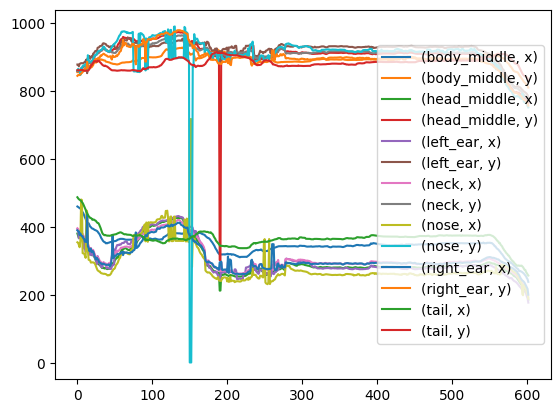

In [129]:
df_xy.plot().legend(loc='right')

In [ ]:
df_flat = df_xy.copy()
df_flat.columns = df_flat.columns.map('_'.join)

In [ ]:
import matplotlib.pyplot as plt 
fig,ax=plt.subplots()
df_flat.plot(x='body_middle_x',y='body_middle_y',ax=ax)
df_flat.plot(x='head_middle_x',y='head_middle_y', ax=ax)
df_flat.plot(x='tail_x',y='tail_y', ax=ax)

In [74]:
destfolder = model.PoseEstimationTask.infer_output_dir(key)
destfolder

PosixPath('/datajoint-data/data/tobiasr/RN_OPI-1681_2023-04-05_scan9FHELAYA_sess9FHELAYA/device_mini2p1_top_recording_scan9FHELAYA_model_Head_orientation-NK')

In [75]:
from deeplabcut.utils.make_labeled_video import create_labeled_video

video_path = find_full_path( # Fetch the full video path
    get_dlc_root_data_dir(), ((model.VideoRecording.File & key).fetch1("file_path"))
)

config_paths = sorted( # Of configs in the project path, defer to the datajoint-saved
    list(
        find_full_path(
            get_dlc_root_data_dir(), ((model.Model & key).fetch1("project_path"))
        ).glob("*.y*ml")
    )
)

create_labeled_video( # Pass strings to label the video
    config=str(config_paths[-1]),
    videos=str(video_path),
    destfolder=str(destfolder),
)

# list(list(pathlib.Path((model.VideoRecording.File & key).fetch1("file_path")).parent.glob("device*"))[0].glob("*.y*ml"))

Starting to process video: /datajoint-data/data/tobiasr/RN_OPI-1681_2023-04-05_scan9FHELAYA_sess9FHELAYA/scan9FHELAYA_top_video_2023-04-05T15_19_53.mp4-copy.mp4
Loading /datajoint-data/data/tobiasr/RN_OPI-1681_2023-04-05_scan9FHELAYA_sess9FHELAYA/scan9FHELAYA_top_video_2023-04-05T15_19_53.mp4-copy.mp4 and data.
Duration of video [s]: 10.05, recorded with 60.0 fps!
Overall # of frames: 603 with cropped frame dimensions: 1000 1000
Generating frames and creating video.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 603/603 [00:04<00:00, 130.04it/s]


[True]

In [59]:
moviepath = str(list(pathlib.Path((model.VideoRecording.File & key).fetch1("file_path")).glob("*53.mp4"))[0])
moviepath


IndexError: list index out of range

In [ ]:
(model.VideoRecording.File & key).fetch1("file_path")

In [ ]:
list(list(pathlib.Path((model.VideoRecording.File & key).fetch1("file_path")).parent.glob("device*"))[0].glob("*.y*ml"))